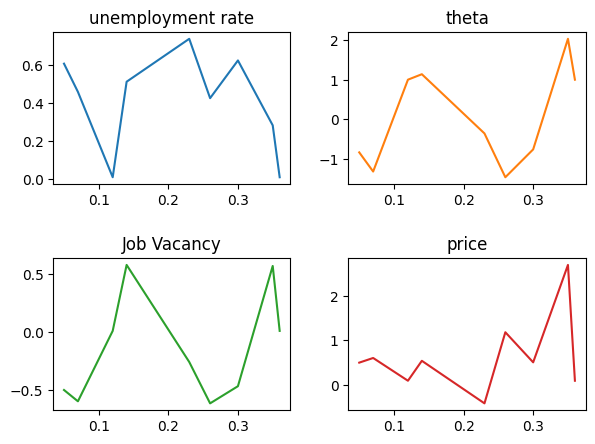

In [2]:
# solve the system of nonlinear equations in aging labor market and unemployment 
# method 1: fsolve

import scipy
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

s = 0.6 # the bargaining power of the workers
psi_e = 0
psi_u = 0.5
psi_a = 1
n = 1
y_u = 0.4
y_a = 0.4

y = 1
c = 0.2
delta = 0.1

# let the matching function in labor market 
# m(u,v)=kappa*u**zeta*v**(1-zeta) 
# then q(theta) = m(u,v)/v = kappa*theta**(-zeta),f(theta) = m(u,v)/u = kappa*theta**(1-zeta) 

kappa = 0.5
zeta = 0.35

def equations(z):
    u, theta, bar_p = z
# use np.sign(a)*(np.abs(a))**(-zeta) to avoid Numpy not allowing fractional powers of negative numbers
    q = kappa*np.sign(theta)*(np.abs(theta)) ** (-zeta)
    f = theta*q
    b = (n-u)*(1+psi_e)+u*(1+psi_u)+a*(1+psi_a)
    w = (1-s)*y_u + s*pi
    niu = min(1,(n-u)/b)
    
    return (c-q*(1-s)*(pi-y_u), 
            (n-u)*(1+psi_e)/b*(1-2*psi_e/(1+psi_e)*niu
                              )*w/bar_p*(bar_p-c)
            +u*(1+psi_u)/b*(1-2*psi_u/(1+psi_u)*niu
                              )*y_u/bar_p*(bar_p-c)
            +a*(1+psi_a)/b*(1-2*psi_a/(1+psi_a)*niu
                              )*y_a/bar_p*(bar_p-c)
            -pi,
            u-n*(1-f)-(n-u)*delta
           )


unemp = []
price = []
tight_labor = []
aging = []
vacant = []

pi = 0.4
max_a = 0.5
for a in np.arange(0, max_a, 0.01):
    u, theta, bar_p=  fsolve(equations, (0.01, 1, 0.1))
    if u > 0 and u < 0.9:
        unemp.append(u)
        tight_labor.append(theta)
        price.append(bar_p)
        aging.append(a)
        vacant.append(u*theta)        
        
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(aging, unemp)
axs[0, 0].set_title('unemployment rate')
axs[0, 1].plot(aging, tight_labor, 'tab:orange')
axs[0, 1].set_title('theta')
axs[1, 0].plot(aging, vacant, 'tab:green')
axs[1, 0].set_title('Job Vacancy')
axs[1, 1].plot(aging, price, 'tab:red')
axs[1, 1].set_title('price')

fig.tight_layout(pad=2.0)

plt.savefig('aging vs u theta vacancy and price with fixed profit.png')


plt.show()

Text(0.5, 1.0, 'price')

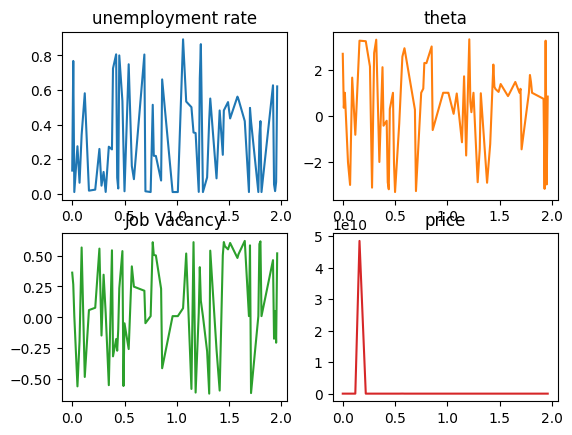

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(aging, unemp)
axs[0, 0].set_title('unemployment rate')
axs[0, 1].plot(aging, tight_labor, 'tab:orange')
axs[0, 1].set_title('theta')
axs[1, 0].plot(aging, vacant, 'tab:green')
axs[1, 0].set_title('Job Vacancy')
axs[1, 1].plot(aging, price, 'tab:red')
axs[1, 1].set_title('price')

Text(0.5, 1.0, 'price')

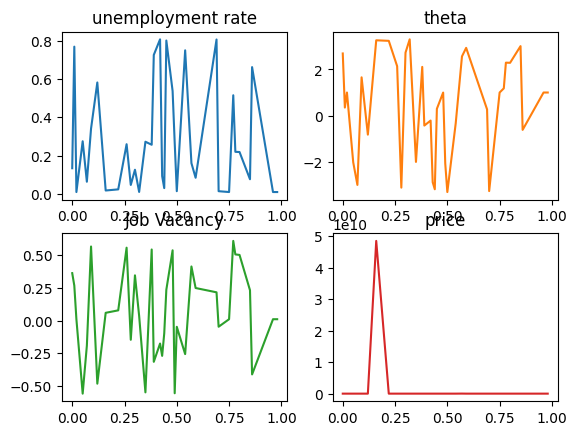

In [10]:
import scipy
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

s = 0.6 # the bargaining power of the workers
psi_e = 0
psi_u = 0.5
psi_a = 1
n = 1
y_u = 0.4
y_a = 0.4

c = 0.2
delta = 0.1

# let the matching function in labor market 
# m(u,v)=kappa*u**zeta*v**(1-zeta) 
# then q(theta) = m(u,v)/v = kappa*theta**(-zeta),f(theta) = m(u,v)/u = kappa*theta**(1-zeta) 

kappa = 0.5
zeta = 0.35

def equations(z):
    u, theta, bar_p = z
# use np.sign(a)*(np.abs(a))**(-zeta) to avoid Numpy not allowing fractional powers of negative numbers
    q = kappa*np.sign(theta)*(np.abs(theta)) ** (-zeta)
    f = theta*q
    b = (n-u)*(1+psi_e)+u*(1+psi_u)+a*(1+psi_a)
    w = (1-s)*y_u + s*pi
    
    return (c-q*(1-s)*(pi-y_u), 
            (n-u)*(1+psi_e)/b*(1-2*psi_e/(1+psi_e)*(n-u)/b
                              )*w/bar_p*(bar_p-c)
            +u*(1+psi_u)/b*(1-2*psi_u/(1+psi_u)*u/b
                              )*y_u/bar_p*(bar_p-c)
            +a*(1+psi_a)/b*(1-2*psi_a/(1+psi_a)*a/b
                              )*y_a/bar_p*(bar_p-c)
            -pi,
            u-n*(1-f)-(n-u)*delta
           )


unemp = []
price = []
tight_labor = []
aging = []
vacant = []

pi = 0.4
max_a = 0.5


for a in np.arange(0, 1, 0.01):
    u, theta, bar_p=  fsolve(equations, (0.01, 1, 0.1))
    if u > 0 and u < 0.9:
        unemp.append(u)
        tight_labor.append(theta)
        price.append(bar_p)
        aging.append(a)
        vacant.append(u*theta)        

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(aging, unemp)
axs[0, 0].set_title('unemployment rate')
axs[0, 1].plot(aging, tight_labor, 'tab:orange')
axs[0, 1].set_title('theta')
axs[1, 0].plot(aging, vacant, 'tab:green')
axs[1, 0].set_title('Job Vacancy')
axs[1, 1].plot(aging, price, 'tab:red')
axs[1, 1].set_title('price')